# Test a meta-reinforcement learning model (A2C) on an associative learning task

In this post, I want to explore the power of a simple meta-reinforcement learning (meta-RL) model on simple associative learning tasks. This is the second post on my journey to understand meta-RL models and hopefully tweak them to behave like humans; and you can check out my overall project proposal here (TODO: hyperlink). This post assumes that you have basic knowledge on reinforcement learning (RL), and you can check out these awesome resources to get more resources (TODO)

## What is meta-reinforcement learning?

The term "meta" confused me for a long time, so let's understand "meta-learning" in a clearer term: **learning to learn**. Imagine the traditional way we train a RL model to play the Pong game. For example, we can decide to pick the DQN algorithm, specify the number of layers and units in the Q-network, and finally choose our favorite loss function and optimizer. We may get lucky this time and the model plays Pong well, but this combination of choices may not work for the GO game, and we need to start from scratch and test numerous other algorithms. What if we can train a model to *learn the best learning algorithm for the task*? Wouldn't it be wonderful if we have such a model that can figure out the best way to learn in the current task setting? This is the essence of meta-RL models: **find the best learning aglorithm for the task with reinforcement learning**.

## Promising future for meta-RL models

Meta-RL models TODO

## Why should we test the model on associative learning tasks?

Associative learning tasks are pretty common in the cognitive science field but not so much in computer science, but in our context they are simple multi-armed bandit tasks. You might think that multi-armed bandit task is one of the most basic problems in RL and countless algorithms are already built to solve it near-optimally, why bother testing it? Well, here are several reasons:

1. *Most of RL algorithms have built-in memory one way or another, but meta-RL algorithms don't*. Traditional models keep information of rewarding state-action pairs in Q-tables or value networks, so the way they utilize these memory resources are designed by the human researchers. On the other hand, the learning algorithms learned by meta-RL models are complete black boxes; researchers only specifies the number of memory units that the learning algorithm can use, and how these memory units are used is totally up to the algorithm. **By testing the meta-RL algorithm on associative learning tasks, we hope to understand how they utilize the given memory resources.


2. *While researchers can easily expand the memory resources in RL algorithms, you can't do the same things to humans.* Humans have very limited memory resources, and their performance fell short even in simple associative learning tasks as the number of state-action pairs increases. However, humans seem to recognize this limit and they can act in a near-optimal fashion under this constraint. **It is therefore intriguing to see whether the learning algorithm learned by the meta-RL model can show similar behavior under limited memory resources.**

Let's quickly go through the procedure of the associative learning task. As shown in Fig. 1, the model was trained on multiple associative learning blocks which have either 3 or 6 objects. At the start of each block, each object will be randomly associated with one of the three buttons. For each trial within each block, the model observes one stimulus (one-hot encoded in the experiment), presses one of the three action buttons, and finally gets feedback on whether the object-action pair is correct or not.

I will train an iconic meta-RL model, an A2C algorithm with 20 LSTM units, on 20 million trials. We will compare the behavior between human participants and the trained meta-RL model. 

## The associative learning task

![](images/Collins2018_task_fig.png)
Fig. 1. Experiment procedure of the associative learning task.

### First, let's setup the environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

plt.style.use('seaborn-dark-palette')
mpl.rcParams['axes.titlesize'] = 20

### Second, let's train the model

In [2]:
from envs.Collins2018 import Collins2018Task
from utils.utils import do_experiment

# specify the agent and the environment
num_lstm_units = 20
num_train_steps = 20_000_000
policy_kwargs = {'n_lstm': num_lstm_units, 'action_noise': 0}
env = Collins2018Task(num_objects=(3, 6), num_actions=3, num_repeats=13)

do_experiment(env, num_train_steps, policy_kwargs)

/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/tensorflow/

---------------------------------
| explained_variance | -0.128   |
| fps                | 7        |
| nupdates           | 1        |
| policy_entropy     | 1.07     |
| total_timesteps    | 20       |
| value_loss         | 7.91     |
---------------------------------
---------------------------------
| ep_len_mean        | 62.4     |
| ep_reward_mean     | 21.5     |
| explained_variance | -0.00225 |
| fps                | 988      |
| nupdates           | 1000     |
| policy_entropy     | 1.08     |
| total_timesteps    | 20000    |
| value_loss         | 0.483    |
---------------------------------
---------------------------------
| ep_len_mean        | 59.3     |
| ep_reward_mean     | 20.8     |
| explained_variance | 0.348    |
| fps                | 1056     |
| nupdates           | 2000     |
| policy_entropy     | 1.08     |
| total_timesteps    | 40000    |
| value_loss         | 0.279    |
---------------------------------
---------------------------------
| ep_len_mean 

---------------------------------
| ep_len_mean        | 57.3     |
| ep_reward_mean     | 28.2     |
| explained_variance | 0.101    |
| fps                | 1139     |
| nupdates           | 22000    |
| policy_entropy     | 0.221    |
| total_timesteps    | 440000   |
| value_loss         | 5.7      |
---------------------------------
---------------------------------
| ep_len_mean        | 55.8     |
| ep_reward_mean     | 28.4     |
| explained_variance | -0.383   |
| fps                | 1142     |
| nupdates           | 23000    |
| policy_entropy     | 0.0732   |
| total_timesteps    | 460000   |
| value_loss         | 0.582    |
---------------------------------
---------------------------------
| ep_len_mean        | 58.9     |
| ep_reward_mean     | 27.7     |
| explained_variance | 0.437    |
| fps                | 1146     |
| nupdates           | 24000    |
| policy_entropy     | 0.106    |
| total_timesteps    | 480000   |
| value_loss         | 2.12     |
--------------

---------------------------------
| ep_len_mean        | 62       |
| ep_reward_mean     | 29.1     |
| explained_variance | -0.897   |
| fps                | 1185     |
| nupdates           | 47000    |
| policy_entropy     | 0.247    |
| total_timesteps    | 940000   |
| value_loss         | 1.46     |
---------------------------------
---------------------------------
| ep_len_mean        | 60.1     |
| ep_reward_mean     | 29.5     |
| explained_variance | 0.0396   |
| fps                | 1186     |
| nupdates           | 48000    |
| policy_entropy     | 0.655    |
| total_timesteps    | 960000   |
| value_loss         | 2.22     |
---------------------------------
---------------------------------
| ep_len_mean        | 61.2     |
| ep_reward_mean     | 28.8     |
| explained_variance | -0.157   |
| fps                | 1187     |
| nupdates           | 49000    |
| policy_entropy     | 0.527    |
| total_timesteps    | 980000   |
| value_loss         | 2.45     |
--------------

---------------------------------
| ep_len_mean        | 59.3     |
| ep_reward_mean     | 29.5     |
| explained_variance | 0.873    |
| fps                | 1229     |
| nupdates           | 21000    |
| policy_entropy     | 0.457    |
| total_timesteps    | 1420000  |
| value_loss         | 1.04     |
---------------------------------
---------------------------------
| ep_len_mean        | 56.2     |
| ep_reward_mean     | 31.4     |
| explained_variance | -0.483   |
| fps                | 1230     |
| nupdates           | 22000    |
| policy_entropy     | 0.0343   |
| total_timesteps    | 1440000  |
| value_loss         | 0.604    |
---------------------------------
---------------------------------
| ep_len_mean        | 60.1     |
| ep_reward_mean     | 31.8     |
| explained_variance | 0.48     |
| fps                | 1229     |
| nupdates           | 23000    |
| policy_entropy     | 0.0471   |
| total_timesteps    | 1460000  |
| value_loss         | 2.35     |
--------------

---------------------------------
| ep_len_mean        | 55.4     |
| ep_reward_mean     | 30       |
| explained_variance | 0.0995   |
| fps                | 1233     |
| nupdates           | 46000    |
| policy_entropy     | 0.815    |
| total_timesteps    | 1920000  |
| value_loss         | 1.75     |
---------------------------------
---------------------------------
| ep_len_mean        | 55.4     |
| ep_reward_mean     | 28.6     |
| explained_variance | -1.68    |
| fps                | 1233     |
| nupdates           | 47000    |
| policy_entropy     | 0.451    |
| total_timesteps    | 1940000  |
| value_loss         | 2.44     |
---------------------------------
---------------------------------
| ep_len_mean        | 59.3     |
| ep_reward_mean     | 28.7     |
| explained_variance | 0.878    |
| fps                | 1233     |
| nupdates           | 48000    |
| policy_entropy     | 0.18     |
| total_timesteps    | 1960000  |
| value_loss         | 0.856    |
--------------

---------------------------------
| ep_len_mean        | 58.9     |
| ep_reward_mean     | 29.6     |
| explained_variance | 0.607    |
| fps                | 1234     |
| nupdates           | 20000    |
| policy_entropy     | 0.571    |
| total_timesteps    | 2400000  |
| value_loss         | 0.615    |
---------------------------------
---------------------------------
| ep_len_mean        | 61.6     |
| ep_reward_mean     | 30.5     |
| explained_variance | 0.705    |
| fps                | 1231     |
| nupdates           | 21000    |
| policy_entropy     | 0.465    |
| total_timesteps    | 2420000  |
| value_loss         | 2.11     |
---------------------------------
---------------------------------
| ep_len_mean        | 55       |
| ep_reward_mean     | 28.3     |
| explained_variance | -0.365   |
| fps                | 1230     |
| nupdates           | 22000    |
| policy_entropy     | 1.02     |
| total_timesteps    | 2440000  |
| value_loss         | 1.84     |
--------------

---------------------------------
| ep_len_mean        | 57.7     |
| ep_reward_mean     | 32.9     |
| explained_variance | -0.453   |
| fps                | 1221     |
| nupdates           | 45000    |
| policy_entropy     | 0.196    |
| total_timesteps    | 2900000  |
| value_loss         | 0.803    |
---------------------------------
---------------------------------
| ep_len_mean        | 57.7     |
| ep_reward_mean     | 29.8     |
| explained_variance | -3.28    |
| fps                | 1221     |
| nupdates           | 46000    |
| policy_entropy     | 0.221    |
| total_timesteps    | 2920000  |
| value_loss         | 1.89     |
---------------------------------
---------------------------------
| ep_len_mean        | 58.1     |
| ep_reward_mean     | 31.1     |
| explained_variance | -0.54    |
| fps                | 1221     |
| nupdates           | 47000    |
| policy_entropy     | 0.667    |
| total_timesteps    | 2940000  |
| value_loss         | 0.752    |
--------------

---------------------------------
| ep_len_mean        | 59.3     |
| ep_reward_mean     | 31.1     |
| explained_variance | 0.0259   |
| fps                | 1224     |
| nupdates           | 19000    |
| policy_entropy     | 0.133    |
| total_timesteps    | 3380000  |
| value_loss         | 1.02     |
---------------------------------
---------------------------------
| ep_len_mean        | 57.3     |
| ep_reward_mean     | 31.6     |
| explained_variance | 0.133    |
| fps                | 1224     |
| nupdates           | 20000    |
| policy_entropy     | 0.804    |
| total_timesteps    | 3400000  |
| value_loss         | 0.454    |
---------------------------------
---------------------------------
| ep_len_mean        | 60.8     |
| ep_reward_mean     | 33.3     |
| explained_variance | -0.0392  |
| fps                | 1225     |
| nupdates           | 21000    |
| policy_entropy     | 0.0251   |
| total_timesteps    | 3420000  |
| value_loss         | 1.26     |
--------------

---------------------------------
| ep_len_mean        | 54.2     |
| ep_reward_mean     | 31.1     |
| explained_variance | -0.311   |
| fps                | 1224     |
| nupdates           | 44000    |
| policy_entropy     | 0.456    |
| total_timesteps    | 3880000  |
| value_loss         | 0.864    |
---------------------------------
---------------------------------
| ep_len_mean        | 56.9     |
| ep_reward_mean     | 33.8     |
| explained_variance | 0.926    |
| fps                | 1224     |
| nupdates           | 45000    |
| policy_entropy     | 0.0552   |
| total_timesteps    | 3900000  |
| value_loss         | 0.464    |
---------------------------------
---------------------------------
| ep_len_mean        | 59.7     |
| ep_reward_mean     | 34.4     |
| explained_variance | -0.289   |
| fps                | 1224     |
| nupdates           | 46000    |
| policy_entropy     | 0.00215  |
| total_timesteps    | 3920000  |
| value_loss         | 0.555    |
--------------

---------------------------------
| ep_len_mean        | 57.3     |
| ep_reward_mean     | 33.4     |
| explained_variance | -0.756   |
| fps                | 1222     |
| nupdates           | 18000    |
| policy_entropy     | 0.491    |
| total_timesteps    | 4360000  |
| value_loss         | 1.19     |
---------------------------------
---------------------------------
| ep_len_mean        | 60.1     |
| ep_reward_mean     | 35.3     |
| explained_variance | -0.708   |
| fps                | 1223     |
| nupdates           | 19000    |
| policy_entropy     | 0.287    |
| total_timesteps    | 4380000  |
| value_loss         | 0.617    |
---------------------------------
---------------------------------
| ep_len_mean        | 60.5     |
| ep_reward_mean     | 35.3     |
| explained_variance | -1.13    |
| fps                | 1223     |
| nupdates           | 20000    |
| policy_entropy     | 0.496    |
| total_timesteps    | 4400000  |
| value_loss         | 2.26     |
--------------

---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 36.5     |
| explained_variance | 0.535    |
| fps                | 1222     |
| nupdates           | 43000    |
| policy_entropy     | 0.127    |
| total_timesteps    | 4860000  |
| value_loss         | 2.92     |
---------------------------------
---------------------------------
| ep_len_mean        | 60.8     |
| ep_reward_mean     | 35.8     |
| explained_variance | -0.167   |
| fps                | 1222     |
| nupdates           | 44000    |
| policy_entropy     | 0.15     |
| total_timesteps    | 4880000  |
| value_loss         | 0.512    |
---------------------------------
---------------------------------
| ep_len_mean        | 59.3     |
| ep_reward_mean     | 36       |
| explained_variance | 0.947    |
| fps                | 1222     |
| nupdates           | 45000    |
| policy_entropy     | 0.0793   |
| total_timesteps    | 4900000  |
| value_loss         | 0.397    |
--------------

---------------------------------
| ep_len_mean        | 60.8     |
| ep_reward_mean     | 37.4     |
| explained_variance | 0.866    |
| fps                | 1223     |
| nupdates           | 17000    |
| policy_entropy     | 0.283    |
| total_timesteps    | 5340000  |
| value_loss         | 0.867    |
---------------------------------
---------------------------------
| ep_len_mean        | 56.5     |
| ep_reward_mean     | 36.8     |
| explained_variance | -1.45    |
| fps                | 1223     |
| nupdates           | 18000    |
| policy_entropy     | 0.486    |
| total_timesteps    | 5360000  |
| value_loss         | 3.88     |
---------------------------------
---------------------------------
| ep_len_mean        | 58.1     |
| ep_reward_mean     | 35       |
| explained_variance | 0.896    |
| fps                | 1223     |
| nupdates           | 19000    |
| policy_entropy     | 0.0464   |
| total_timesteps    | 5380000  |
| value_loss         | 0.201    |
--------------

---------------------------------
| ep_len_mean        | 57.7     |
| ep_reward_mean     | 40.5     |
| explained_variance | 0.921    |
| fps                | 1221     |
| nupdates           | 42000    |
| policy_entropy     | 0.0483   |
| total_timesteps    | 5840000  |
| value_loss         | 0.0378   |
---------------------------------
---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 39.1     |
| explained_variance | -0.0587  |
| fps                | 1221     |
| nupdates           | 43000    |
| policy_entropy     | 0.313    |
| total_timesteps    | 5860000  |
| value_loss         | 1.77     |
---------------------------------
---------------------------------
| ep_len_mean        | 56.5     |
| ep_reward_mean     | 39.4     |
| explained_variance | -0.205   |
| fps                | 1222     |
| nupdates           | 44000    |
| policy_entropy     | 0.324    |
| total_timesteps    | 5880000  |
| value_loss         | 1.3      |
--------------

---------------------------------
| ep_len_mean        | 56.2     |
| ep_reward_mean     | 42.3     |
| explained_variance | 0.957    |
| fps                | 1221     |
| nupdates           | 16000    |
| policy_entropy     | 0.161    |
| total_timesteps    | 6320000  |
| value_loss         | 0.35     |
---------------------------------
---------------------------------
| ep_len_mean        | 58.9     |
| ep_reward_mean     | 42       |
| explained_variance | 0.388    |
| fps                | 1222     |
| nupdates           | 17000    |
| policy_entropy     | 0.202    |
| total_timesteps    | 6340000  |
| value_loss         | 7.63     |
---------------------------------
---------------------------------
| ep_len_mean        | 60.1     |
| ep_reward_mean     | 44.6     |
| explained_variance | 0.951    |
| fps                | 1221     |
| nupdates           | 18000    |
| policy_entropy     | 0.025    |
| total_timesteps    | 6360000  |
| value_loss         | 0.0714   |
--------------

---------------------------------
| ep_len_mean        | 54.6     |
| ep_reward_mean     | 41.1     |
| explained_variance | 0.809    |
| fps                | 1221     |
| nupdates           | 41000    |
| policy_entropy     | 0.361    |
| total_timesteps    | 6820000  |
| value_loss         | 0.495    |
---------------------------------
---------------------------------
| ep_len_mean        | 61.6     |
| ep_reward_mean     | 45.4     |
| explained_variance | 0.335    |
| fps                | 1220     |
| nupdates           | 42000    |
| policy_entropy     | 0.0918   |
| total_timesteps    | 6840000  |
| value_loss         | 0.203    |
---------------------------------
---------------------------------
| ep_len_mean        | 57.7     |
| ep_reward_mean     | 41.6     |
| explained_variance | 0.943    |
| fps                | 1220     |
| nupdates           | 43000    |
| policy_entropy     | 0.0685   |
| total_timesteps    | 6860000  |
| value_loss         | 0.449    |
--------------

---------------------------------
| ep_len_mean        | 57.7     |
| ep_reward_mean     | 43.5     |
| explained_variance | 0.677    |
| fps                | 1219     |
| nupdates           | 15000    |
| policy_entropy     | 0.328    |
| total_timesteps    | 7300000  |
| value_loss         | 0.597    |
---------------------------------
---------------------------------
| ep_len_mean        | 59.3     |
| ep_reward_mean     | 44.6     |
| explained_variance | 0.766    |
| fps                | 1220     |
| nupdates           | 16000    |
| policy_entropy     | 0.356    |
| total_timesteps    | 7320000  |
| value_loss         | 0.938    |
---------------------------------
---------------------------------
| ep_len_mean        | 59.7     |
| ep_reward_mean     | 44.4     |
| explained_variance | 0.922    |
| fps                | 1219     |
| nupdates           | 17000    |
| policy_entropy     | 0.673    |
| total_timesteps    | 7340000  |
| value_loss         | 3.09     |
--------------

---------------------------------
| ep_len_mean        | 59.3     |
| ep_reward_mean     | 44.8     |
| explained_variance | 0.96     |
| fps                | 1218     |
| nupdates           | 40000    |
| policy_entropy     | 0.015    |
| total_timesteps    | 7800000  |
| value_loss         | 0.457    |
---------------------------------
---------------------------------
| ep_len_mean        | 57.7     |
| ep_reward_mean     | 44.3     |
| explained_variance | -0.221   |
| fps                | 1218     |
| nupdates           | 41000    |
| policy_entropy     | 0.212    |
| total_timesteps    | 7820000  |
| value_loss         | 0.702    |
---------------------------------
---------------------------------
| ep_len_mean        | 57.3     |
| ep_reward_mean     | 44.1     |
| explained_variance | -0.401   |
| fps                | 1218     |
| nupdates           | 42000    |
| policy_entropy     | 0.199    |
| total_timesteps    | 7840000  |
| value_loss         | 2.69     |
--------------

---------------------------------
| ep_len_mean        | 58.1     |
| ep_reward_mean     | 44.1     |
| explained_variance | 0.0227   |
| fps                | 1216     |
| nupdates           | 14000    |
| policy_entropy     | 0.101    |
| total_timesteps    | 8280000  |
| value_loss         | 0.529    |
---------------------------------
---------------------------------
| ep_len_mean        | 58.1     |
| ep_reward_mean     | 44.3     |
| explained_variance | -2.35    |
| fps                | 1216     |
| nupdates           | 15000    |
| policy_entropy     | 0.287    |
| total_timesteps    | 8300000  |
| value_loss         | 1.24     |
---------------------------------
---------------------------------
| ep_len_mean        | 56.2     |
| ep_reward_mean     | 43.9     |
| explained_variance | -0.39    |
| fps                | 1216     |
| nupdates           | 16000    |
| policy_entropy     | 0.216    |
| total_timesteps    | 8320000  |
| value_loss         | 1.07     |
--------------

---------------------------------
| ep_len_mean        | 60.8     |
| ep_reward_mean     | 47.9     |
| explained_variance | 0.832    |
| fps                | 1214     |
| nupdates           | 39000    |
| policy_entropy     | 0.156    |
| total_timesteps    | 8780000  |
| value_loss         | 1.46     |
---------------------------------
---------------------------------
| ep_len_mean        | 55.4     |
| ep_reward_mean     | 44.9     |
| explained_variance | 0.0857   |
| fps                | 1214     |
| nupdates           | 40000    |
| policy_entropy     | 0.249    |
| total_timesteps    | 8800000  |
| value_loss         | 11.8     |
---------------------------------
---------------------------------
| ep_len_mean        | 58.1     |
| ep_reward_mean     | 46.2     |
| explained_variance | -0.619   |
| fps                | 1214     |
| nupdates           | 41000    |
| policy_entropy     | 0.205    |
| total_timesteps    | 8820000  |
| value_loss         | 6.57     |
--------------

---------------------------------
| ep_len_mean        | 59.3     |
| ep_reward_mean     | 47.4     |
| explained_variance | 0.221    |
| fps                | 1217     |
| nupdates           | 13000    |
| policy_entropy     | 0.158    |
| total_timesteps    | 9260000  |
| value_loss         | 0.299    |
---------------------------------
---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 47.6     |
| explained_variance | 0.64     |
| fps                | 1217     |
| nupdates           | 14000    |
| policy_entropy     | 0.0412   |
| total_timesteps    | 9280000  |
| value_loss         | 0.146    |
---------------------------------
---------------------------------
| ep_len_mean        | 58.1     |
| ep_reward_mean     | 47.1     |
| explained_variance | -0.897   |
| fps                | 1217     |
| nupdates           | 15000    |
| policy_entropy     | 0.321    |
| total_timesteps    | 9300000  |
| value_loss         | 0.387    |
--------------

---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 47.4     |
| explained_variance | 0.931    |
| fps                | 1216     |
| nupdates           | 38000    |
| policy_entropy     | 0.18     |
| total_timesteps    | 9760000  |
| value_loss         | 1.72     |
---------------------------------
---------------------------------
| ep_len_mean        | 56.2     |
| ep_reward_mean     | 47.6     |
| explained_variance | 0.922    |
| fps                | 1216     |
| nupdates           | 39000    |
| policy_entropy     | 0.195    |
| total_timesteps    | 9780000  |
| value_loss         | 1.46     |
---------------------------------
---------------------------------
| ep_len_mean        | 55.8     |
| ep_reward_mean     | 47.2     |
| explained_variance | 0.781    |
| fps                | 1216     |
| nupdates           | 40000    |
| policy_entropy     | 0.0793   |
| total_timesteps    | 9800000  |
| value_loss         | 1.35     |
--------------

---------------------------------
| ep_len_mean        | 57.7     |
| ep_reward_mean     | 47.5     |
| explained_variance | -1       |
| fps                | 1214     |
| nupdates           | 12000    |
| policy_entropy     | 0.157    |
| total_timesteps    | 10240000 |
| value_loss         | 1.19     |
---------------------------------
---------------------------------
| ep_len_mean        | 59.3     |
| ep_reward_mean     | 50.1     |
| explained_variance | 0.995    |
| fps                | 1214     |
| nupdates           | 13000    |
| policy_entropy     | 0.00292  |
| total_timesteps    | 10260000 |
| value_loss         | 0.0146   |
---------------------------------
---------------------------------
| ep_len_mean        | 58.1     |
| ep_reward_mean     | 48.2     |
| explained_variance | 0.981    |
| fps                | 1214     |
| nupdates           | 14000    |
| policy_entropy     | 0.0254   |
| total_timesteps    | 10280000 |
| value_loss         | 0.0381   |
--------------

---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 49.9     |
| explained_variance | 0.92     |
| fps                | 1215     |
| nupdates           | 37000    |
| policy_entropy     | 0.04     |
| total_timesteps    | 10740000 |
| value_loss         | 1.33     |
---------------------------------
---------------------------------
| ep_len_mean        | 55.4     |
| ep_reward_mean     | 47.2     |
| explained_variance | 0.528    |
| fps                | 1215     |
| nupdates           | 38000    |
| policy_entropy     | 0.0841   |
| total_timesteps    | 10760000 |
| value_loss         | 0.183    |
---------------------------------
---------------------------------
| ep_len_mean        | 60.8     |
| ep_reward_mean     | 51.2     |
| explained_variance | 0.923    |
| fps                | 1215     |
| nupdates           | 39000    |
| policy_entropy     | 0.151    |
| total_timesteps    | 10780000 |
| value_loss         | 0.421    |
--------------

---------------------------------
| ep_len_mean        | 59.3     |
| ep_reward_mean     | 50.1     |
| explained_variance | 0.826    |
| fps                | 1208     |
| nupdates           | 11000    |
| policy_entropy     | 0.201    |
| total_timesteps    | 11220000 |
| value_loss         | 1.88     |
---------------------------------
---------------------------------
| ep_len_mean        | 57.3     |
| ep_reward_mean     | 50.3     |
| explained_variance | 0.32     |
| fps                | 1209     |
| nupdates           | 12000    |
| policy_entropy     | 0.135    |
| total_timesteps    | 11240000 |
| value_loss         | 10.1     |
---------------------------------
---------------------------------
| ep_len_mean        | 60.8     |
| ep_reward_mean     | 52       |
| explained_variance | 0.994    |
| fps                | 1209     |
| nupdates           | 13000    |
| policy_entropy     | 0.0243   |
| total_timesteps    | 11260000 |
| value_loss         | 0.136    |
--------------

---------------------------------
| ep_len_mean        | 59.7     |
| ep_reward_mean     | 51.7     |
| explained_variance | -0.782   |
| fps                | 1211     |
| nupdates           | 36000    |
| policy_entropy     | 0.0294   |
| total_timesteps    | 11720000 |
| value_loss         | 0.556    |
---------------------------------
---------------------------------
| ep_len_mean        | 55       |
| ep_reward_mean     | 47.4     |
| explained_variance | -0.05    |
| fps                | 1211     |
| nupdates           | 37000    |
| policy_entropy     | 0.117    |
| total_timesteps    | 11740000 |
| value_loss         | 0.701    |
---------------------------------
---------------------------------
| ep_len_mean        | 57.7     |
| ep_reward_mean     | 50.2     |
| explained_variance | 0.704    |
| fps                | 1211     |
| nupdates           | 38000    |
| policy_entropy     | 0.359    |
| total_timesteps    | 11760000 |
| value_loss         | 2.47     |
--------------

---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 50.1     |
| explained_variance | 0.357    |
| fps                | 1213     |
| nupdates           | 10000    |
| policy_entropy     | 0.212    |
| total_timesteps    | 12200000 |
| value_loss         | 1.12     |
---------------------------------
---------------------------------
| ep_len_mean        | 59.3     |
| ep_reward_mean     | 52       |
| explained_variance | -0.332   |
| fps                | 1212     |
| nupdates           | 11000    |
| policy_entropy     | 0.133    |
| total_timesteps    | 12220000 |
| value_loss         | 9.88     |
---------------------------------
---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 50.6     |
| explained_variance | -0.238   |
| fps                | 1213     |
| nupdates           | 12000    |
| policy_entropy     | 0.125    |
| total_timesteps    | 12240000 |
| value_loss         | 11.4     |
--------------

---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 52       |
| explained_variance | 0.823    |
| fps                | 1212     |
| nupdates           | 35000    |
| policy_entropy     | 0.0201   |
| total_timesteps    | 12700000 |
| value_loss         | 2.89     |
---------------------------------
---------------------------------
| ep_len_mean        | 58.9     |
| ep_reward_mean     | 51.5     |
| explained_variance | 0.321    |
| fps                | 1212     |
| nupdates           | 36000    |
| policy_entropy     | 0.0435   |
| total_timesteps    | 12720000 |
| value_loss         | 0.235    |
---------------------------------
---------------------------------
| ep_len_mean        | 57.3     |
| ep_reward_mean     | 50       |
| explained_variance | -0.444   |
| fps                | 1212     |
| nupdates           | 37000    |
| policy_entropy     | 0.112    |
| total_timesteps    | 12740000 |
| value_loss         | 0.946    |
--------------

---------------------------------
| ep_len_mean        | 58.9     |
| ep_reward_mean     | 50.4     |
| explained_variance | 0.956    |
| fps                | 1201     |
| nupdates           | 9000     |
| policy_entropy     | 0.0919   |
| total_timesteps    | 13180000 |
| value_loss         | 0.0709   |
---------------------------------
---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 51.4     |
| explained_variance | 0.721    |
| fps                | 1201     |
| nupdates           | 10000    |
| policy_entropy     | 0.0911   |
| total_timesteps    | 13200000 |
| value_loss         | 0.155    |
---------------------------------
---------------------------------
| ep_len_mean        | 58.1     |
| ep_reward_mean     | 50.3     |
| explained_variance | 0.9      |
| fps                | 1203     |
| nupdates           | 11000    |
| policy_entropy     | 0.188    |
| total_timesteps    | 13220000 |
| value_loss         | 0.689    |
--------------

---------------------------------
| ep_len_mean        | 57.7     |
| ep_reward_mean     | 51.7     |
| explained_variance | -0.0899  |
| fps                | 1212     |
| nupdates           | 34000    |
| policy_entropy     | 0.162    |
| total_timesteps    | 13680000 |
| value_loss         | 11.9     |
---------------------------------
---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 52.1     |
| explained_variance | 0.979    |
| fps                | 1213     |
| nupdates           | 35000    |
| policy_entropy     | 0.104    |
| total_timesteps    | 13700000 |
| value_loss         | 0.226    |
---------------------------------
---------------------------------
| ep_len_mean        | 60.8     |
| ep_reward_mean     | 54.2     |
| explained_variance | -5.49    |
| fps                | 1212     |
| nupdates           | 36000    |
| policy_entropy     | 0.0276   |
| total_timesteps    | 13720000 |
| value_loss         | 0.0371   |
--------------

---------------------------------
| ep_len_mean        | 58.1     |
| ep_reward_mean     | 51.7     |
| explained_variance | 0.631    |
| fps                | 1208     |
| nupdates           | 8000     |
| policy_entropy     | 0.0612   |
| total_timesteps    | 14160000 |
| value_loss         | 0.254    |
---------------------------------
---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 52.5     |
| explained_variance | 0.994    |
| fps                | 1208     |
| nupdates           | 9000     |
| policy_entropy     | 0.0776   |
| total_timesteps    | 14180000 |
| value_loss         | 0.0135   |
---------------------------------
---------------------------------
| ep_len_mean        | 61.2     |
| ep_reward_mean     | 54.7     |
| explained_variance | 0.723    |
| fps                | 1207     |
| nupdates           | 10000    |
| policy_entropy     | 0.104    |
| total_timesteps    | 14200000 |
| value_loss         | 0.085    |
--------------

---------------------------------
| ep_len_mean        | 59.3     |
| ep_reward_mean     | 53.8     |
| explained_variance | 0.339    |
| fps                | 1185     |
| nupdates           | 33000    |
| policy_entropy     | 0.212    |
| total_timesteps    | 14660000 |
| value_loss         | 5.3      |
---------------------------------
---------------------------------
| ep_len_mean        | 60.5     |
| ep_reward_mean     | 54.6     |
| explained_variance | 0.618    |
| fps                | 1185     |
| nupdates           | 34000    |
| policy_entropy     | 0.251    |
| total_timesteps    | 14680000 |
| value_loss         | 2.45     |
---------------------------------
---------------------------------
| ep_len_mean        | 59.7     |
| ep_reward_mean     | 53.2     |
| explained_variance | -0.147   |
| fps                | 1185     |
| nupdates           | 35000    |
| policy_entropy     | 0.117    |
| total_timesteps    | 14700000 |
| value_loss         | 13.4     |
--------------

---------------------------------
| ep_len_mean        | 57.3     |
| ep_reward_mean     | 52       |
| explained_variance | 0.361    |
| fps                | 1210     |
| nupdates           | 7000     |
| policy_entropy     | 0.0208   |
| total_timesteps    | 15140000 |
| value_loss         | 0.0462   |
---------------------------------
---------------------------------
| ep_len_mean        | 60.1     |
| ep_reward_mean     | 54.2     |
| explained_variance | 0.58     |
| fps                | 1210     |
| nupdates           | 8000     |
| policy_entropy     | 0.128    |
| total_timesteps    | 15160000 |
| value_loss         | 7.09     |
---------------------------------
---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 52.6     |
| explained_variance | -8.62    |
| fps                | 1210     |
| nupdates           | 9000     |
| policy_entropy     | 0.0754   |
| total_timesteps    | 15180000 |
| value_loss         | 0.0893   |
--------------

---------------------------------
| ep_len_mean        | 59.3     |
| ep_reward_mean     | 53.3     |
| explained_variance | 0.784    |
| fps                | 1207     |
| nupdates           | 32000    |
| policy_entropy     | 0.0754   |
| total_timesteps    | 15640000 |
| value_loss         | 0.0624   |
---------------------------------
---------------------------------
| ep_len_mean        | 57.7     |
| ep_reward_mean     | 52.3     |
| explained_variance | 0.941    |
| fps                | 1206     |
| nupdates           | 33000    |
| policy_entropy     | 0.0175   |
| total_timesteps    | 15660000 |
| value_loss         | 0.215    |
---------------------------------
---------------------------------
| ep_len_mean        | 60.5     |
| ep_reward_mean     | 54.7     |
| explained_variance | 0.978    |
| fps                | 1205     |
| nupdates           | 34000    |
| policy_entropy     | 0.181    |
| total_timesteps    | 15680000 |
| value_loss         | 0.225    |
--------------

---------------------------------
| ep_len_mean        | 61.6     |
| ep_reward_mean     | 55.6     |
| explained_variance | 0.0546   |
| fps                | 1211     |
| nupdates           | 6000     |
| policy_entropy     | 0.263    |
| total_timesteps    | 16120000 |
| value_loss         | 3.18     |
---------------------------------
---------------------------------
| ep_len_mean        | 57.3     |
| ep_reward_mean     | 52.2     |
| explained_variance | 0.937    |
| fps                | 1212     |
| nupdates           | 7000     |
| policy_entropy     | 0.0942   |
| total_timesteps    | 16140000 |
| value_loss         | 0.709    |
---------------------------------
---------------------------------
| ep_len_mean        | 55.4     |
| ep_reward_mean     | 49.6     |
| explained_variance | 0.335    |
| fps                | 1211     |
| nupdates           | 8000     |
| policy_entropy     | 0.0959   |
| total_timesteps    | 16160000 |
| value_loss         | 0.381    |
--------------

---------------------------------
| ep_len_mean        | 58.9     |
| ep_reward_mean     | 53       |
| explained_variance | 0.997    |
| fps                | 1209     |
| nupdates           | 31000    |
| policy_entropy     | 0.066    |
| total_timesteps    | 16620000 |
| value_loss         | 0.0553   |
---------------------------------
---------------------------------
| ep_len_mean        | 55       |
| ep_reward_mean     | 50.1     |
| explained_variance | 0.748    |
| fps                | 1209     |
| nupdates           | 32000    |
| policy_entropy     | 0.141    |
| total_timesteps    | 16640000 |
| value_loss         | 0.134    |
---------------------------------
---------------------------------
| ep_len_mean        | 58.9     |
| ep_reward_mean     | 53.2     |
| explained_variance | -0.0786  |
| fps                | 1209     |
| nupdates           | 33000    |
| policy_entropy     | 0.0168   |
| total_timesteps    | 16660000 |
| value_loss         | 0.128    |
--------------

---------------------------------
| ep_len_mean        | 57.3     |
| ep_reward_mean     | 52.1     |
| explained_variance | 0.801    |
| fps                | 1211     |
| nupdates           | 5000     |
| policy_entropy     | 0.147    |
| total_timesteps    | 17100000 |
| value_loss         | 0.0407   |
---------------------------------
---------------------------------
| ep_len_mean        | 61.2     |
| ep_reward_mean     | 55.1     |
| explained_variance | 0.972    |
| fps                | 1212     |
| nupdates           | 6000     |
| policy_entropy     | 0.122    |
| total_timesteps    | 17120000 |
| value_loss         | 0.342    |
---------------------------------
---------------------------------
| ep_len_mean        | 56.9     |
| ep_reward_mean     | 51.9     |
| explained_variance | 0.671    |
| fps                | 1211     |
| nupdates           | 7000     |
| policy_entropy     | 0.116    |
| total_timesteps    | 17140000 |
| value_loss         | 2.53     |
--------------

---------------------------------
| ep_len_mean        | 58.1     |
| ep_reward_mean     | 52.8     |
| explained_variance | 0.984    |
| fps                | 1208     |
| nupdates           | 30000    |
| policy_entropy     | 0.0922   |
| total_timesteps    | 17600000 |
| value_loss         | 0.104    |
---------------------------------
---------------------------------
| ep_len_mean        | 55.8     |
| ep_reward_mean     | 50.5     |
| explained_variance | -0.283   |
| fps                | 1208     |
| nupdates           | 31000    |
| policy_entropy     | 0.0174   |
| total_timesteps    | 17620000 |
| value_loss         | 0.0974   |
---------------------------------
---------------------------------
| ep_len_mean        | 55.4     |
| ep_reward_mean     | 50.4     |
| explained_variance | 0.954    |
| fps                | 1208     |
| nupdates           | 32000    |
| policy_entropy     | 0.0107   |
| total_timesteps    | 17640000 |
| value_loss         | 0.0515   |
--------------

---------------------------------
| ep_len_mean        | 56.9     |
| ep_reward_mean     | 51.9     |
| explained_variance | -0.416   |
| fps                | 1213     |
| nupdates           | 4000     |
| policy_entropy     | 0.0859   |
| total_timesteps    | 18080000 |
| value_loss         | 0.0495   |
---------------------------------
---------------------------------
| ep_len_mean        | 57.7     |
| ep_reward_mean     | 52.3     |
| explained_variance | 0.246    |
| fps                | 1210     |
| nupdates           | 5000     |
| policy_entropy     | 0.109    |
| total_timesteps    | 18100000 |
| value_loss         | 0.133    |
---------------------------------
---------------------------------
| ep_len_mean        | 60.5     |
| ep_reward_mean     | 54.6     |
| explained_variance | 0.724    |
| fps                | 1209     |
| nupdates           | 6000     |
| policy_entropy     | 0.0961   |
| total_timesteps    | 18120000 |
| value_loss         | 0.0988   |
--------------

---------------------------------
| ep_len_mean        | 60.1     |
| ep_reward_mean     | 54.6     |
| explained_variance | 0.892    |
| fps                | 1211     |
| nupdates           | 29000    |
| policy_entropy     | 0.303    |
| total_timesteps    | 18580000 |
| value_loss         | 0.65     |
---------------------------------
---------------------------------
| ep_len_mean        | 58.1     |
| ep_reward_mean     | 53       |
| explained_variance | 0.123    |
| fps                | 1211     |
| nupdates           | 30000    |
| policy_entropy     | 0.0727   |
| total_timesteps    | 18600000 |
| value_loss         | 0.0487   |
---------------------------------
---------------------------------
| ep_len_mean        | 60.1     |
| ep_reward_mean     | 54.8     |
| explained_variance | 0.998    |
| fps                | 1211     |
| nupdates           | 31000    |
| policy_entropy     | 0.00513  |
| total_timesteps    | 18620000 |
| value_loss         | 0.0179   |
--------------

---------------------------------
| ep_len_mean        | 58.1     |
| ep_reward_mean     | 52.8     |
| explained_variance | 0.998    |
| fps                | 1211     |
| nupdates           | 3000     |
| policy_entropy     | 0.0394   |
| total_timesteps    | 19060000 |
| value_loss         | 0.0133   |
---------------------------------
---------------------------------
| ep_len_mean        | 59.3     |
| ep_reward_mean     | 54.1     |
| explained_variance | 0.994    |
| fps                | 1212     |
| nupdates           | 4000     |
| policy_entropy     | 0.0441   |
| total_timesteps    | 19080000 |
| value_loss         | 0.00517  |
---------------------------------
---------------------------------
| ep_len_mean        | 56.5     |
| ep_reward_mean     | 51.4     |
| explained_variance | 0.866    |
| fps                | 1212     |
| nupdates           | 5000     |
| policy_entropy     | 0.0893   |
| total_timesteps    | 19100000 |
| value_loss         | 0.0325   |
--------------

---------------------------------
| ep_len_mean        | 55.4     |
| ep_reward_mean     | 50.3     |
| explained_variance | 0.971    |
| fps                | 1212     |
| nupdates           | 28000    |
| policy_entropy     | 0.238    |
| total_timesteps    | 19560000 |
| value_loss         | 0.274    |
---------------------------------
---------------------------------
| ep_len_mean        | 55       |
| ep_reward_mean     | 49.7     |
| explained_variance | 0.478    |
| fps                | 1212     |
| nupdates           | 29000    |
| policy_entropy     | 0.0137   |
| total_timesteps    | 19580000 |
| value_loss         | 0.0945   |
---------------------------------
---------------------------------
| ep_len_mean        | 58.1     |
| ep_reward_mean     | 53.2     |
| explained_variance | -0.052   |
| fps                | 1211     |
| nupdates           | 30000    |
| policy_entropy     | 0.19     |
| total_timesteps    | 19600000 |
| value_loss         | 0.493    |
--------------

---------------------------------
| ep_len_mean        | 60.1     |
| ep_reward_mean     | 54.2     |
| explained_variance | 0.0915   |
| fps                | 1205     |
| nupdates           | 2000     |
| policy_entropy     | 0.0112   |
| total_timesteps    | 20040000 |
| value_loss         | 0.0868   |
---------------------------------
---------------------------------
| ep_len_mean        | 58.9     |
| ep_reward_mean     | 53.5     |
| explained_variance | 0.0474   |
| fps                | 1203     |
| nupdates           | 3000     |
| policy_entropy     | 0.0848   |
| total_timesteps    | 20060000 |
| value_loss         | 0.486    |
---------------------------------
---------------------------------
| ep_len_mean        | 56.9     |
| ep_reward_mean     | 51.6     |
| explained_variance | 0.822    |
| fps                | 1202     |
| nupdates           | 4000     |
| policy_entropy     | 0.0411   |
| total_timesteps    | 20080000 |
| value_loss         | 0.145    |
--------------

---------------------------------
| ep_len_mean        | 59.7     |
| ep_reward_mean     | 54.1     |
| explained_variance | 0.601    |
| fps                | 1174     |
| nupdates           | 27000    |
| policy_entropy     | 0.107    |
| total_timesteps    | 20540000 |
| value_loss         | 0.292    |
---------------------------------
---------------------------------
| ep_len_mean        | 59.3     |
| ep_reward_mean     | 53.6     |
| explained_variance | 0.0748   |
| fps                | 1170     |
| nupdates           | 28000    |
| policy_entropy     | 0.296    |
| total_timesteps    | 20560000 |
| value_loss         | 4.04     |
---------------------------------
---------------------------------
| ep_len_mean        | 56.9     |
| ep_reward_mean     | 51.3     |
| explained_variance | 0.698    |
| fps                | 1169     |
| nupdates           | 29000    |
| policy_entropy     | 0.00694  |
| total_timesteps    | 20580000 |
| value_loss         | 0.00894  |
--------------

---------------------------------
| ep_len_mean        | 60.8     |
| ep_reward_mean     | 54.7     |
| explained_variance | -2.41    |
| fps                | 1212     |
| nupdates           | 1000     |
| policy_entropy     | 0.0249   |
| total_timesteps    | 21020000 |
| value_loss         | 0.0889   |
---------------------------------
---------------------------------
| ep_len_mean        | 57.3     |
| ep_reward_mean     | 52       |
| explained_variance | -0.984   |
| fps                | 1212     |
| nupdates           | 2000     |
| policy_entropy     | 0.0553   |
| total_timesteps    | 21040000 |
| value_loss         | 0.00602  |
---------------------------------
---------------------------------
| ep_len_mean        | 58.1     |
| ep_reward_mean     | 52.9     |
| explained_variance | -31.8    |
| fps                | 1208     |
| nupdates           | 3000     |
| policy_entropy     | 0.0817   |
| total_timesteps    | 21060000 |
| value_loss         | 0.00694  |
--------------

---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 52.6     |
| explained_variance | 0.245    |
| fps                | 1209     |
| nupdates           | 26000    |
| policy_entropy     | 0.166    |
| total_timesteps    | 21520000 |
| value_loss         | 0.155    |
---------------------------------
---------------------------------
| ep_len_mean        | 56.2     |
| ep_reward_mean     | 50.2     |
| explained_variance | -0.734   |
| fps                | 1209     |
| nupdates           | 27000    |
| policy_entropy     | 0.0875   |
| total_timesteps    | 21540000 |
| value_loss         | 0.157    |
---------------------------------
---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 52.7     |
| explained_variance | 0.324    |
| fps                | 1209     |
| nupdates           | 28000    |
| policy_entropy     | 0.112    |
| total_timesteps    | 21560000 |
| value_loss         | 0.291    |
--------------

---------------------------------
| ep_len_mean        | 60.1     |
| ep_reward_mean     | 54.8     |
| explained_variance | 0.974    |
| fps                | 1130     |
| nupdates           | 1        |
| policy_entropy     | 0.057    |
| total_timesteps    | 22000020 |
| value_loss         | 0.129    |
---------------------------------
---------------------------------
| ep_len_mean        | 57.7     |
| ep_reward_mean     | 52.3     |
| explained_variance | 0.666    |
| fps                | 1210     |
| nupdates           | 1000     |
| policy_entropy     | 0.131    |
| total_timesteps    | 22020000 |
| value_loss         | 3.34     |
---------------------------------
---------------------------------
| ep_len_mean        | 59.7     |
| ep_reward_mean     | 53.5     |
| explained_variance | 0.597    |
| fps                | 1207     |
| nupdates           | 2000     |
| policy_entropy     | 0.0175   |
| total_timesteps    | 22040000 |
| value_loss         | 0.119    |
--------------

---------------------------------
| ep_len_mean        | 55.8     |
| ep_reward_mean     | 50       |
| explained_variance | 0.567    |
| fps                | 1209     |
| nupdates           | 25000    |
| policy_entropy     | 0.0328   |
| total_timesteps    | 22500000 |
| value_loss         | 5.27     |
---------------------------------
---------------------------------
| ep_len_mean        | 57.3     |
| ep_reward_mean     | 51.9     |
| explained_variance | -0.53    |
| fps                | 1209     |
| nupdates           | 26000    |
| policy_entropy     | 0.0794   |
| total_timesteps    | 22520000 |
| value_loss         | 0.128    |
---------------------------------
---------------------------------
| ep_len_mean        | 59.7     |
| ep_reward_mean     | 53.5     |
| explained_variance | 0.987    |
| fps                | 1210     |
| nupdates           | 27000    |
| policy_entropy     | 0.0311   |
| total_timesteps    | 22540000 |
| value_loss         | 0.00936  |
--------------

---------------------------------
| ep_len_mean        | 55       |
| ep_reward_mean     | 47.6     |
| explained_variance | 0.222    |
| fps                | 1210     |
| nupdates           | 50000    |
| policy_entropy     | 0.173    |
| total_timesteps    | 23000000 |
| value_loss         | 0.532    |
---------------------------------
---------------------------------
| ep_len_mean        | 55       |
| ep_reward_mean     | 47.6     |
| explained_variance | 0.511    |
| fps                | 1171     |
| nupdates           | 1        |
| policy_entropy     | 0.0184   |
| total_timesteps    | 23000020 |
| value_loss         | 0.239    |
---------------------------------
---------------------------------
| ep_len_mean        | 56.2     |
| ep_reward_mean     | 48.1     |
| explained_variance | -0.318   |
| fps                | 1214     |
| nupdates           | 1000     |
| policy_entropy     | 0.119    |
| total_timesteps    | 23020000 |
| value_loss         | 0.399    |
--------------

---------------------------------
| ep_len_mean        | 59.7     |
| ep_reward_mean     | 53.5     |
| explained_variance | 0.321    |
| fps                | 1212     |
| nupdates           | 24000    |
| policy_entropy     | 0.0607   |
| total_timesteps    | 23480000 |
| value_loss         | 0.0381   |
---------------------------------
---------------------------------
| ep_len_mean        | 60.1     |
| ep_reward_mean     | 54.6     |
| explained_variance | 0.106    |
| fps                | 1211     |
| nupdates           | 25000    |
| policy_entropy     | 0.0403   |
| total_timesteps    | 23500000 |
| value_loss         | 0.209    |
---------------------------------
---------------------------------
| ep_len_mean        | 60.8     |
| ep_reward_mean     | 53.8     |
| explained_variance | -0.134   |
| fps                | 1212     |
| nupdates           | 26000    |
| policy_entropy     | 0.152    |
| total_timesteps    | 23520000 |
| value_loss         | 0.241    |
--------------

---------------------------------
| ep_len_mean        | 57.3     |
| ep_reward_mean     | 51.3     |
| explained_variance | 0.236    |
| fps                | 1211     |
| nupdates           | 49000    |
| policy_entropy     | 0.157    |
| total_timesteps    | 23980000 |
| value_loss         | 0.242    |
---------------------------------
---------------------------------
| ep_len_mean        | 56.5     |
| ep_reward_mean     | 50.9     |
| explained_variance | 0.265    |
| fps                | 1211     |
| nupdates           | 50000    |
| policy_entropy     | 0.0529   |
| total_timesteps    | 24000000 |
| value_loss         | 0.176    |
---------------------------------
---------------------------------
| ep_len_mean        | 56.9     |
| ep_reward_mean     | 51.2     |
| explained_variance | 0.044    |
| fps                | 1150     |
| nupdates           | 1        |
| policy_entropy     | 0.123    |
| total_timesteps    | 24000020 |
| value_loss         | 7.98     |
--------------

---------------------------------
| ep_len_mean        | 58.1     |
| ep_reward_mean     | 51.4     |
| explained_variance | 0.199    |
| fps                | 1206     |
| nupdates           | 23000    |
| policy_entropy     | 0.0417   |
| total_timesteps    | 24460000 |
| value_loss         | 0.875    |
---------------------------------
---------------------------------
| ep_len_mean        | 59.7     |
| ep_reward_mean     | 53.7     |
| explained_variance | 0.872    |
| fps                | 1206     |
| nupdates           | 24000    |
| policy_entropy     | 0.107    |
| total_timesteps    | 24480000 |
| value_loss         | 1.19     |
---------------------------------
---------------------------------
| ep_len_mean        | 57.7     |
| ep_reward_mean     | 51.2     |
| explained_variance | 0.939    |
| fps                | 1206     |
| nupdates           | 25000    |
| policy_entropy     | 0.389    |
| total_timesteps    | 24500000 |
| value_loss         | 0.242    |
--------------

---------------------------------
| ep_len_mean        | 59.3     |
| ep_reward_mean     | 52.2     |
| explained_variance | 0.0681   |
| fps                | 1207     |
| nupdates           | 48000    |
| policy_entropy     | 0.0242   |
| total_timesteps    | 24960000 |
| value_loss         | 19.6     |
---------------------------------
---------------------------------
| ep_len_mean        | 57.7     |
| ep_reward_mean     | 52.4     |
| explained_variance | 0.993    |
| fps                | 1207     |
| nupdates           | 49000    |
| policy_entropy     | 0.029    |
| total_timesteps    | 24980000 |
| value_loss         | 0.0328   |
---------------------------------
---------------------------------
| ep_len_mean        | 58.1     |
| ep_reward_mean     | 52.1     |
| explained_variance | -0.897   |
| fps                | 1207     |
| nupdates           | 50000    |
| policy_entropy     | 0.348    |
| total_timesteps    | 25000000 |
| value_loss         | 0.322    |
--------------

---------------------------------
| ep_len_mean        | 56.9     |
| ep_reward_mean     | 51.9     |
| explained_variance | 0.445    |
| fps                | 1213     |
| nupdates           | 22000    |
| policy_entropy     | 0.0401   |
| total_timesteps    | 25440000 |
| value_loss         | 0.00801  |
---------------------------------
---------------------------------
| ep_len_mean        | 59.3     |
| ep_reward_mean     | 53.5     |
| explained_variance | -0.582   |
| fps                | 1213     |
| nupdates           | 23000    |
| policy_entropy     | 0.13     |
| total_timesteps    | 25460000 |
| value_loss         | 0.284    |
---------------------------------
---------------------------------
| ep_len_mean        | 60.5     |
| ep_reward_mean     | 54.1     |
| explained_variance | -0.143   |
| fps                | 1213     |
| nupdates           | 24000    |
| policy_entropy     | 0.123    |
| total_timesteps    | 25480000 |
| value_loss         | 13.9     |
--------------

---------------------------------
| ep_len_mean        | 57.7     |
| ep_reward_mean     | 51.4     |
| explained_variance | 0.567    |
| fps                | 1211     |
| nupdates           | 47000    |
| policy_entropy     | 0.188    |
| total_timesteps    | 25940000 |
| value_loss         | 2.16     |
---------------------------------
---------------------------------
| ep_len_mean        | 55       |
| ep_reward_mean     | 49.4     |
| explained_variance | -0.467   |
| fps                | 1211     |
| nupdates           | 48000    |
| policy_entropy     | 0.0726   |
| total_timesteps    | 25960000 |
| value_loss         | 0.244    |
---------------------------------
---------------------------------
| ep_len_mean        | 58.9     |
| ep_reward_mean     | 52.2     |
| explained_variance | -1.59    |
| fps                | 1211     |
| nupdates           | 49000    |
| policy_entropy     | 0.0254   |
| total_timesteps    | 25980000 |
| value_loss         | 0.28     |
--------------

---------------------------------
| ep_len_mean        | 60.8     |
| ep_reward_mean     | 54.4     |
| explained_variance | -0.167   |
| fps                | 1209     |
| nupdates           | 21000    |
| policy_entropy     | 0.0858   |
| total_timesteps    | 26420000 |
| value_loss         | 0.349    |
---------------------------------
---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 52.1     |
| explained_variance | 0.991    |
| fps                | 1209     |
| nupdates           | 22000    |
| policy_entropy     | 0.0421   |
| total_timesteps    | 26440000 |
| value_loss         | 0.0134   |
---------------------------------
---------------------------------
| ep_len_mean        | 59.3     |
| ep_reward_mean     | 53.2     |
| explained_variance | 0.572    |
| fps                | 1209     |
| nupdates           | 23000    |
| policy_entropy     | 0.141    |
| total_timesteps    | 26460000 |
| value_loss         | 0.134    |
--------------

---------------------------------
| ep_len_mean        | 59.7     |
| ep_reward_mean     | 51.7     |
| explained_variance | 0.934    |
| fps                | 1208     |
| nupdates           | 46000    |
| policy_entropy     | 0.23     |
| total_timesteps    | 26920000 |
| value_loss         | 0.584    |
---------------------------------
---------------------------------
| ep_len_mean        | 55.4     |
| ep_reward_mean     | 47.8     |
| explained_variance | 0.235    |
| fps                | 1208     |
| nupdates           | 47000    |
| policy_entropy     | 0.124    |
| total_timesteps    | 26940000 |
| value_loss         | 10.9     |
---------------------------------
---------------------------------
| ep_len_mean        | 56.5     |
| ep_reward_mean     | 48.7     |
| explained_variance | -40      |
| fps                | 1208     |
| nupdates           | 48000    |
| policy_entropy     | 0.0441   |
| total_timesteps    | 26960000 |
| value_loss         | 0.00648  |
--------------

---------------------------------
| ep_len_mean        | 55.4     |
| ep_reward_mean     | 49.8     |
| explained_variance | 0.906    |
| fps                | 1208     |
| nupdates           | 20000    |
| policy_entropy     | 0.0294   |
| total_timesteps    | 27400000 |
| value_loss         | 0.652    |
---------------------------------
---------------------------------
| ep_len_mean        | 55.8     |
| ep_reward_mean     | 50.1     |
| explained_variance | 0.825    |
| fps                | 1209     |
| nupdates           | 21000    |
| policy_entropy     | 0.0442   |
| total_timesteps    | 27420000 |
| value_loss         | 0.323    |
---------------------------------
---------------------------------
| ep_len_mean        | 60.1     |
| ep_reward_mean     | 53.3     |
| explained_variance | 0.99     |
| fps                | 1209     |
| nupdates           | 22000    |
| policy_entropy     | 0.0245   |
| total_timesteps    | 27440000 |
| value_loss         | 0.0182   |
--------------

---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 52.9     |
| explained_variance | 0.847    |
| fps                | 1208     |
| nupdates           | 45000    |
| policy_entropy     | 0.00621  |
| total_timesteps    | 27900000 |
| value_loss         | 0.0999   |
---------------------------------
---------------------------------
| ep_len_mean        | 57.3     |
| ep_reward_mean     | 51.1     |
| explained_variance | 0.455    |
| fps                | 1208     |
| nupdates           | 46000    |
| policy_entropy     | 0.0708   |
| total_timesteps    | 27920000 |
| value_loss         | 0.765    |
---------------------------------
---------------------------------
| ep_len_mean        | 58.9     |
| ep_reward_mean     | 52.9     |
| explained_variance | -1.2     |
| fps                | 1208     |
| nupdates           | 47000    |
| policy_entropy     | 0.0448   |
| total_timesteps    | 27940000 |
| value_loss         | 0.184    |
--------------

---------------------------------
| ep_len_mean        | 57.7     |
| ep_reward_mean     | 51.1     |
| explained_variance | 0.939    |
| fps                | 1204     |
| nupdates           | 19000    |
| policy_entropy     | 0.179    |
| total_timesteps    | 28380000 |
| value_loss         | 0.389    |
---------------------------------
---------------------------------
| ep_len_mean        | 57.3     |
| ep_reward_mean     | 50.5     |
| explained_variance | 0.962    |
| fps                | 1204     |
| nupdates           | 20000    |
| policy_entropy     | 0.0824   |
| total_timesteps    | 28400000 |
| value_loss         | 0.409    |
---------------------------------
---------------------------------
| ep_len_mean        | 59.7     |
| ep_reward_mean     | 53.6     |
| explained_variance | -0.0878  |
| fps                | 1204     |
| nupdates           | 21000    |
| policy_entropy     | 0.108    |
| total_timesteps    | 28420000 |
| value_loss         | 0.137    |
--------------

---------------------------------
| ep_len_mean        | 55       |
| ep_reward_mean     | 49.2     |
| explained_variance | 0.958    |
| fps                | 1204     |
| nupdates           | 44000    |
| policy_entropy     | 0.00516  |
| total_timesteps    | 28880000 |
| value_loss         | 0.049    |
---------------------------------
---------------------------------
| ep_len_mean        | 57.7     |
| ep_reward_mean     | 51.8     |
| explained_variance | -0.194   |
| fps                | 1204     |
| nupdates           | 45000    |
| policy_entropy     | 0.0841   |
| total_timesteps    | 28900000 |
| value_loss         | 3.1      |
---------------------------------
---------------------------------
| ep_len_mean        | 60.1     |
| ep_reward_mean     | 54.5     |
| explained_variance | 0.591    |
| fps                | 1204     |
| nupdates           | 46000    |
| policy_entropy     | 0.0122   |
| total_timesteps    | 28920000 |
| value_loss         | 0.00377  |
--------------

---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 51.9     |
| explained_variance | 0.735    |
| fps                | 1197     |
| nupdates           | 18000    |
| policy_entropy     | 0.344    |
| total_timesteps    | 29360000 |
| value_loss         | 0.188    |
---------------------------------
---------------------------------
| ep_len_mean        | 57.3     |
| ep_reward_mean     | 51.3     |
| explained_variance | 0.65     |
| fps                | 1197     |
| nupdates           | 19000    |
| policy_entropy     | 0.0113   |
| total_timesteps    | 29380000 |
| value_loss         | 0.105    |
---------------------------------
---------------------------------
| ep_len_mean        | 59.7     |
| ep_reward_mean     | 54.3     |
| explained_variance | 0.667    |
| fps                | 1197     |
| nupdates           | 20000    |
| policy_entropy     | 0.201    |
| total_timesteps    | 29400000 |
| value_loss         | 5.2      |
--------------

---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 52.5     |
| explained_variance | 0.707    |
| fps                | 1202     |
| nupdates           | 43000    |
| policy_entropy     | 0.0192   |
| total_timesteps    | 29860000 |
| value_loss         | 0.065    |
---------------------------------
---------------------------------
| ep_len_mean        | 57.3     |
| ep_reward_mean     | 51.7     |
| explained_variance | 0.793    |
| fps                | 1202     |
| nupdates           | 44000    |
| policy_entropy     | 0.0644   |
| total_timesteps    | 29880000 |
| value_loss         | 5.95     |
---------------------------------
---------------------------------
| ep_len_mean        | 60.5     |
| ep_reward_mean     | 55.1     |
| explained_variance | 0.468    |
| fps                | 1202     |
| nupdates           | 45000    |
| policy_entropy     | 0.149    |
| total_timesteps    | 29900000 |
| value_loss         | 0.376    |
--------------

---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 53.1     |
| explained_variance | 0.99     |
| fps                | 1207     |
| nupdates           | 17000    |
| policy_entropy     | 0.0143   |
| total_timesteps    | 30340000 |
| value_loss         | 0.006    |
---------------------------------
---------------------------------
| ep_len_mean        | 56.9     |
| ep_reward_mean     | 51       |
| explained_variance | 0.436    |
| fps                | 1207     |
| nupdates           | 18000    |
| policy_entropy     | 0.286    |
| total_timesteps    | 30360000 |
| value_loss         | 2.22     |
---------------------------------
---------------------------------
| ep_len_mean        | 58.9     |
| ep_reward_mean     | 53       |
| explained_variance | 0.962    |
| fps                | 1207     |
| nupdates           | 19000    |
| policy_entropy     | 0.221    |
| total_timesteps    | 30380000 |
| value_loss         | 0.34     |
--------------

---------------------------------
| ep_len_mean        | 58.1     |
| ep_reward_mean     | 51.5     |
| explained_variance | 0.198    |
| fps                | 1206     |
| nupdates           | 42000    |
| policy_entropy     | 0.115    |
| total_timesteps    | 30840000 |
| value_loss         | 0.196    |
---------------------------------
---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 53.3     |
| explained_variance | 0.867    |
| fps                | 1206     |
| nupdates           | 43000    |
| policy_entropy     | 0.0929   |
| total_timesteps    | 30860000 |
| value_loss         | 1.38     |
---------------------------------
---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 53.5     |
| explained_variance | 0.355    |
| fps                | 1206     |
| nupdates           | 44000    |
| policy_entropy     | 0.0611   |
| total_timesteps    | 30880000 |
| value_loss         | 0.0846   |
--------------

---------------------------------
| ep_len_mean        | 57.3     |
| ep_reward_mean     | 50.7     |
| explained_variance | 0.612    |
| fps                | 1211     |
| nupdates           | 16000    |
| policy_entropy     | 0.00696  |
| total_timesteps    | 31320000 |
| value_loss         | 0.181    |
---------------------------------
---------------------------------
| ep_len_mean        | 58.9     |
| ep_reward_mean     | 53.3     |
| explained_variance | -1.04    |
| fps                | 1211     |
| nupdates           | 17000    |
| policy_entropy     | 0.0816   |
| total_timesteps    | 31340000 |
| value_loss         | 0.179    |
---------------------------------
---------------------------------
| ep_len_mean        | 54.6     |
| ep_reward_mean     | 48.6     |
| explained_variance | 0.712    |
| fps                | 1211     |
| nupdates           | 18000    |
| policy_entropy     | 0.0386   |
| total_timesteps    | 31360000 |
| value_loss         | 0.0713   |
--------------

---------------------------------
| ep_len_mean        | 60.5     |
| ep_reward_mean     | 54.6     |
| explained_variance | 0.322    |
| fps                | 1212     |
| nupdates           | 41000    |
| policy_entropy     | 0.0163   |
| total_timesteps    | 31820000 |
| value_loss         | 0.0553   |
---------------------------------
---------------------------------
| ep_len_mean        | 55       |
| ep_reward_mean     | 49.9     |
| explained_variance | 0.982    |
| fps                | 1212     |
| nupdates           | 42000    |
| policy_entropy     | 0.157    |
| total_timesteps    | 31840000 |
| value_loss         | 0.236    |
---------------------------------
---------------------------------
| ep_len_mean        | 58.9     |
| ep_reward_mean     | 52.1     |
| explained_variance | 0.977    |
| fps                | 1212     |
| nupdates           | 43000    |
| policy_entropy     | 0.116    |
| total_timesteps    | 31860000 |
| value_loss         | 0.132    |
--------------

---------------------------------
| ep_len_mean        | 59.7     |
| ep_reward_mean     | 53.5     |
| explained_variance | -0.567   |
| fps                | 1207     |
| nupdates           | 15000    |
| policy_entropy     | 0.102    |
| total_timesteps    | 32300000 |
| value_loss         | 18.7     |
---------------------------------
---------------------------------
| ep_len_mean        | 61.2     |
| ep_reward_mean     | 55.2     |
| explained_variance | 0.993    |
| fps                | 1207     |
| nupdates           | 16000    |
| policy_entropy     | 0.0299   |
| total_timesteps    | 32320000 |
| value_loss         | 0.135    |
---------------------------------
---------------------------------
| ep_len_mean        | 54.2     |
| ep_reward_mean     | 48.3     |
| explained_variance | -0.1     |
| fps                | 1207     |
| nupdates           | 17000    |
| policy_entropy     | 0.193    |
| total_timesteps    | 32340000 |
| value_loss         | 0.707    |
--------------

---------------------------------
| ep_len_mean        | 61.2     |
| ep_reward_mean     | 55.4     |
| explained_variance | 0.1      |
| fps                | 1207     |
| nupdates           | 40000    |
| policy_entropy     | 0.0152   |
| total_timesteps    | 32800000 |
| value_loss         | 0.14     |
---------------------------------
---------------------------------
| ep_len_mean        | 58.1     |
| ep_reward_mean     | 51.9     |
| explained_variance | -0.129   |
| fps                | 1207     |
| nupdates           | 41000    |
| policy_entropy     | 0.0627   |
| total_timesteps    | 32820000 |
| value_loss         | 6.69     |
---------------------------------
---------------------------------
| ep_len_mean        | 57.7     |
| ep_reward_mean     | 50.5     |
| explained_variance | 0.875    |
| fps                | 1207     |
| nupdates           | 42000    |
| policy_entropy     | 0.15     |
| total_timesteps    | 32840000 |
| value_loss         | 0.693    |
--------------

---------------------------------
| ep_len_mean        | 57.7     |
| ep_reward_mean     | 52.3     |
| explained_variance | 0.817    |
| fps                | 1210     |
| nupdates           | 14000    |
| policy_entropy     | 0.198    |
| total_timesteps    | 33280000 |
| value_loss         | 1.73     |
---------------------------------
---------------------------------
| ep_len_mean        | 62.4     |
| ep_reward_mean     | 55.6     |
| explained_variance | -0.536   |
| fps                | 1210     |
| nupdates           | 15000    |
| policy_entropy     | 0.209    |
| total_timesteps    | 33300000 |
| value_loss         | 18.8     |
---------------------------------
---------------------------------
| ep_len_mean        | 60.5     |
| ep_reward_mean     | 53.7     |
| explained_variance | 0.799    |
| fps                | 1210     |
| nupdates           | 16000    |
| policy_entropy     | 0.167    |
| total_timesteps    | 33320000 |
| value_loss         | 0.255    |
--------------

---------------------------------
| ep_len_mean        | 60.8     |
| ep_reward_mean     | 54.4     |
| explained_variance | 0.169    |
| fps                | 1209     |
| nupdates           | 39000    |
| policy_entropy     | 0.061    |
| total_timesteps    | 33780000 |
| value_loss         | 0.158    |
---------------------------------
---------------------------------
| ep_len_mean        | 58.1     |
| ep_reward_mean     | 51.1     |
| explained_variance | 0.833    |
| fps                | 1209     |
| nupdates           | 40000    |
| policy_entropy     | 0.0245   |
| total_timesteps    | 33800000 |
| value_loss         | 0.595    |
---------------------------------
---------------------------------
| ep_len_mean        | 59.7     |
| ep_reward_mean     | 54.4     |
| explained_variance | 0.85     |
| fps                | 1209     |
| nupdates           | 41000    |
| policy_entropy     | 0.134    |
| total_timesteps    | 33820000 |
| value_loss         | 0.546    |
--------------

---------------------------------
| ep_len_mean        | 58.9     |
| ep_reward_mean     | 53.4     |
| explained_variance | 0.418    |
| fps                | 1206     |
| nupdates           | 13000    |
| policy_entropy     | 0.147    |
| total_timesteps    | 34260000 |
| value_loss         | 0.231    |
---------------------------------
---------------------------------
| ep_len_mean        | 58.1     |
| ep_reward_mean     | 51.9     |
| explained_variance | 0.967    |
| fps                | 1206     |
| nupdates           | 14000    |
| policy_entropy     | 0.226    |
| total_timesteps    | 34280000 |
| value_loss         | 0.286    |
---------------------------------
---------------------------------
| ep_len_mean        | 60.1     |
| ep_reward_mean     | 52.6     |
| explained_variance | 0.462    |
| fps                | 1202     |
| nupdates           | 15000    |
| policy_entropy     | 0.0424   |
| total_timesteps    | 34300000 |
| value_loss         | 0.173    |
--------------

---------------------------------
| ep_len_mean        | 58.1     |
| ep_reward_mean     | 52.9     |
| explained_variance | 0.99     |
| fps                | 1205     |
| nupdates           | 38000    |
| policy_entropy     | 0.131    |
| total_timesteps    | 34760000 |
| value_loss         | 0.371    |
---------------------------------
---------------------------------
| ep_len_mean        | 56.5     |
| ep_reward_mean     | 51.1     |
| explained_variance | 0.125    |
| fps                | 1205     |
| nupdates           | 39000    |
| policy_entropy     | 0.141    |
| total_timesteps    | 34780000 |
| value_loss         | 0.07     |
---------------------------------
---------------------------------
| ep_len_mean        | 57.7     |
| ep_reward_mean     | 51.9     |
| explained_variance | 0.849    |
| fps                | 1205     |
| nupdates           | 40000    |
| policy_entropy     | 0.0523   |
| total_timesteps    | 34800000 |
| value_loss         | 0.0436   |
--------------

---------------------------------
| ep_len_mean        | 59.7     |
| ep_reward_mean     | 53.6     |
| explained_variance | 0.804    |
| fps                | 1208     |
| nupdates           | 12000    |
| policy_entropy     | 0.0109   |
| total_timesteps    | 35240000 |
| value_loss         | 1.51     |
---------------------------------
---------------------------------
| ep_len_mean        | 58.1     |
| ep_reward_mean     | 52.1     |
| explained_variance | 0.499    |
| fps                | 1208     |
| nupdates           | 13000    |
| policy_entropy     | 0.0997   |
| total_timesteps    | 35260000 |
| value_loss         | 0.426    |
---------------------------------
---------------------------------
| ep_len_mean        | 57.3     |
| ep_reward_mean     | 51.9     |
| explained_variance | 0.927    |
| fps                | 1208     |
| nupdates           | 14000    |
| policy_entropy     | 0.312    |
| total_timesteps    | 35280000 |
| value_loss         | 0.611    |
--------------

---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 51.4     |
| explained_variance | 0.748    |
| fps                | 1210     |
| nupdates           | 37000    |
| policy_entropy     | 0.0753   |
| total_timesteps    | 35740000 |
| value_loss         | 0.359    |
---------------------------------
---------------------------------
| ep_len_mean        | 56.9     |
| ep_reward_mean     | 50.4     |
| explained_variance | 0.859    |
| fps                | 1210     |
| nupdates           | 38000    |
| policy_entropy     | 0.0956   |
| total_timesteps    | 35760000 |
| value_loss         | 0.675    |
---------------------------------
---------------------------------
| ep_len_mean        | 60.8     |
| ep_reward_mean     | 54.8     |
| explained_variance | 0.117    |
| fps                | 1210     |
| nupdates           | 39000    |
| policy_entropy     | 0.103    |
| total_timesteps    | 35780000 |
| value_loss         | 0.0962   |
--------------

---------------------------------
| ep_len_mean        | 59.7     |
| ep_reward_mean     | 53.6     |
| explained_variance | -7.46    |
| fps                | 1207     |
| nupdates           | 11000    |
| policy_entropy     | 0.0198   |
| total_timesteps    | 36220000 |
| value_loss         | 0.00611  |
---------------------------------
---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 52       |
| explained_variance | 0.569    |
| fps                | 1207     |
| nupdates           | 12000    |
| policy_entropy     | 0.0657   |
| total_timesteps    | 36240000 |
| value_loss         | 0.132    |
---------------------------------
---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 51.3     |
| explained_variance | 0.993    |
| fps                | 1207     |
| nupdates           | 13000    |
| policy_entropy     | 0.0155   |
| total_timesteps    | 36260000 |
| value_loss         | 0.0426   |
--------------

---------------------------------
| ep_len_mean        | 60.1     |
| ep_reward_mean     | 53.6     |
| explained_variance | 0.35     |
| fps                | 1208     |
| nupdates           | 36000    |
| policy_entropy     | 0.117    |
| total_timesteps    | 36720000 |
| value_loss         | 0.104    |
---------------------------------
---------------------------------
| ep_len_mean        | 60.5     |
| ep_reward_mean     | 54.6     |
| explained_variance | 0.325    |
| fps                | 1208     |
| nupdates           | 37000    |
| policy_entropy     | 0.037    |
| total_timesteps    | 36740000 |
| value_loss         | 0.00765  |
---------------------------------
---------------------------------
| ep_len_mean        | 57.3     |
| ep_reward_mean     | 51.6     |
| explained_variance | 0.695    |
| fps                | 1208     |
| nupdates           | 38000    |
| policy_entropy     | 0.0513   |
| total_timesteps    | 36760000 |
| value_loss         | 2.3      |
--------------

---------------------------------
| ep_len_mean        | 58.1     |
| ep_reward_mean     | 51.3     |
| explained_variance | 0.618    |
| fps                | 1209     |
| nupdates           | 10000    |
| policy_entropy     | 0.0726   |
| total_timesteps    | 37200000 |
| value_loss         | 4.21     |
---------------------------------
---------------------------------
| ep_len_mean        | 57.3     |
| ep_reward_mean     | 51.2     |
| explained_variance | 0.998    |
| fps                | 1209     |
| nupdates           | 11000    |
| policy_entropy     | 0.0652   |
| total_timesteps    | 37220000 |
| value_loss         | 0.0654   |
---------------------------------
---------------------------------
| ep_len_mean        | 56.2     |
| ep_reward_mean     | 50.4     |
| explained_variance | 0.00684  |
| fps                | 1207     |
| nupdates           | 12000    |
| policy_entropy     | 0.146    |
| total_timesteps    | 37240000 |
| value_loss         | 0.204    |
--------------

---------------------------------
| ep_len_mean        | 61.2     |
| ep_reward_mean     | 55.2     |
| explained_variance | 0.935    |
| fps                | 1209     |
| nupdates           | 35000    |
| policy_entropy     | 0.00466  |
| total_timesteps    | 37700000 |
| value_loss         | 0.522    |
---------------------------------
---------------------------------
| ep_len_mean        | 57.3     |
| ep_reward_mean     | 51.8     |
| explained_variance | 0.861    |
| fps                | 1209     |
| nupdates           | 36000    |
| policy_entropy     | 0.129    |
| total_timesteps    | 37720000 |
| value_loss         | 0.576    |
---------------------------------
---------------------------------
| ep_len_mean        | 60.8     |
| ep_reward_mean     | 53       |
| explained_variance | 0.869    |
| fps                | 1209     |
| nupdates           | 37000    |
| policy_entropy     | 0.131    |
| total_timesteps    | 37740000 |
| value_loss         | 1.27     |
--------------

---------------------------------
| ep_len_mean        | 57.3     |
| ep_reward_mean     | 51.5     |
| explained_variance | 0.273    |
| fps                | 1203     |
| nupdates           | 9000     |
| policy_entropy     | 0.0401   |
| total_timesteps    | 38180000 |
| value_loss         | 0.0431   |
---------------------------------
---------------------------------
| ep_len_mean        | 55.8     |
| ep_reward_mean     | 50.3     |
| explained_variance | 0.873    |
| fps                | 1202     |
| nupdates           | 10000    |
| policy_entropy     | 0.165    |
| total_timesteps    | 38200000 |
| value_loss         | 1.29     |
---------------------------------
---------------------------------
| ep_len_mean        | 57.3     |
| ep_reward_mean     | 51.8     |
| explained_variance | 0.979    |
| fps                | 1203     |
| nupdates           | 11000    |
| policy_entropy     | 0.0161   |
| total_timesteps    | 38220000 |
| value_loss         | 0.16     |
--------------

---------------------------------
| ep_len_mean        | 54.6     |
| ep_reward_mean     | 48.9     |
| explained_variance | 0.294    |
| fps                | 1200     |
| nupdates           | 34000    |
| policy_entropy     | 0.0301   |
| total_timesteps    | 38680000 |
| value_loss         | 22.4     |
---------------------------------
---------------------------------
| ep_len_mean        | 60.1     |
| ep_reward_mean     | 52.6     |
| explained_variance | 0.986    |
| fps                | 1200     |
| nupdates           | 35000    |
| policy_entropy     | 0.00994  |
| total_timesteps    | 38700000 |
| value_loss         | 0.0196   |
---------------------------------
---------------------------------
| ep_len_mean        | 58.5     |
| ep_reward_mean     | 52.1     |
| explained_variance | 0.547    |
| fps                | 1200     |
| nupdates           | 36000    |
| policy_entropy     | 0.0656   |
| total_timesteps    | 38720000 |
| value_loss         | 0.133    |
--------------

---------------------------------
| ep_len_mean        | 56.2     |
| ep_reward_mean     | 50.4     |
| explained_variance | 0.793    |
| fps                | 1203     |
| nupdates           | 8000     |
| policy_entropy     | 0.0909   |
| total_timesteps    | 39160000 |
| value_loss         | 0.00874  |
---------------------------------
---------------------------------
| ep_len_mean        | 57.7     |
| ep_reward_mean     | 52.2     |
| explained_variance | 0.984    |
| fps                | 1204     |
| nupdates           | 9000     |
| policy_entropy     | 0.0111   |
| total_timesteps    | 39180000 |
| value_loss         | 0.0131   |
---------------------------------
---------------------------------
| ep_len_mean        | 59.3     |
| ep_reward_mean     | 53.2     |
| explained_variance | -4.8     |
| fps                | 1204     |
| nupdates           | 10000    |
| policy_entropy     | 0.0469   |
| total_timesteps    | 39200000 |
| value_loss         | 0.0113   |
--------------

---------------------------------
| ep_len_mean        | 60.1     |
| ep_reward_mean     | 53.1     |
| explained_variance | 0.775    |
| fps                | 1206     |
| nupdates           | 33000    |
| policy_entropy     | 0.108    |
| total_timesteps    | 39660000 |
| value_loss         | 1.88     |
---------------------------------
---------------------------------
| ep_len_mean        | 57.7     |
| ep_reward_mean     | 51.9     |
| explained_variance | 0.992    |
| fps                | 1205     |
| nupdates           | 34000    |
| policy_entropy     | 0.0081   |
| total_timesteps    | 39680000 |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| ep_len_mean        | 56.9     |
| ep_reward_mean     | 51.4     |
| explained_variance | 0.987    |
| fps                | 1206     |
| nupdates           | 35000    |
| policy_entropy     | 0.0899   |
| total_timesteps    | 39700000 |
| value_loss         | 0.0103   |
--------------

### Finally, let's visualize the model performance

You might encounter tons of warnings if you are running this notebook. This is because I am using the A2C implementation from stable-baselines which uses tensorflow v1.

In [9]:
from utils.utils import Simulation
from envs.GuessBoundary import GuessBoundaryTask
from envs.Collins2018 import Collins2018Task

env = Collins2018Task(num_objects=(1, 2, 3, 4, 5, 6))

sims = [Simulation('./outputs/Collins2018/A2C-LSTM50', env, load_params_file_idx=20_000_000)]
sims[0].evaluate(num_test_episodes=600, num_trials=100, verbose=True)

reward per episode is 39.97 ± 18.57
average episode length is  45.86833333333333


## Monitor training progress

,index,r,l,t,l_moving_avg_100,r_moving_avg_100,t_per_M
0,0,26,78,8.035114,NaN,NaN,0.008035
1,1,20,78,8.105263,NaN,NaN,0.008105
2,2,11,39,8.137454,NaN,NaN,0.008137
3,3,13,78,8.200822,NaN,NaN,0.008201
4,4,26,78,8.263993,NaN,NaN,0.008264
...,...,...,...,...,...,...,...
683352,683352,37,39,33119.670117,60.06,53.75,33.119670
683353,683353,71,78,33119.734574,60.45,54.20,33.119735
683354,683354,71,78,33119.798953,60.84,54.54,33.119799
683355,683355,36,39,33119.824937,60.45,54.23,33.119825


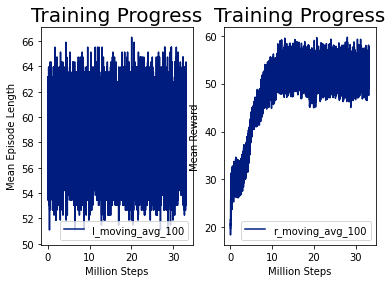

In [4]:
from utils.visualization import plot_training_progress

plot_training_progress(sims[0].model_path)

## Some visualizations specific to Collins 2018 task

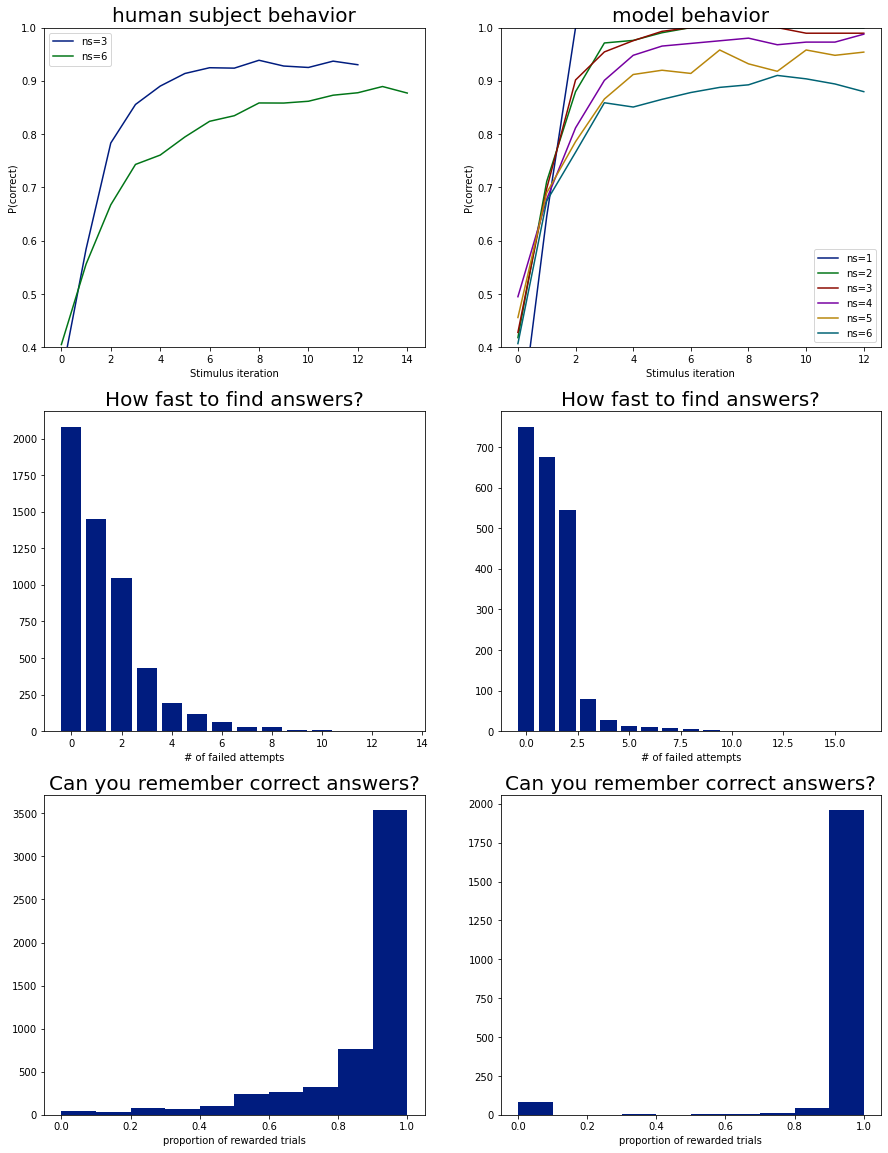

In [10]:
from utils.visualization import plot_associative_learning_progress, calc_exploration_and_retention
from utils.utils import behav2sim

df_behav = behav2sim()
df_model = sims[0].rollouts
dfs = [df_behav, df_model]

fig, axs = plt.subplots(3, len(dfs), figsize=(15, 20))
axs[0, 0].set_title('human subject behavior')
axs[0, 1].set_title('model behavior')
for mdl in range(len(dfs)):
    # does the model learn after multiple stimulus presentations?
    plot_associative_learning_progress(axs[0, mdl], dfs[mdl])

    # does the model learn to attempt different actions after failed trials (before the single success)? 
    calc_exploration_and_retention([axs[1, mdl], axs[2, mdl]], dfs[mdl])
    

# insight: network should be quite larger than the optimal size

Note the small bump at 0 in the bottom right graph. What does this mean?

This means that the trained model has a noticeable chance to completely forget the answer for an object, and this indicates imperfect memory retention.

### Do we observe any artifacts unique to the models?

Yes. Since the objects are coded 0-2 and 0-5 in the 3- and 6-object tasks respectively, the model may be trained more on the first three objects and less the last three. On the other hand, humans subjects might show similar trends since their working memory is already pre-occupied by earlier objects, but the effect shouldn't but huge.

Here is the comparison between the human behavior and the model:

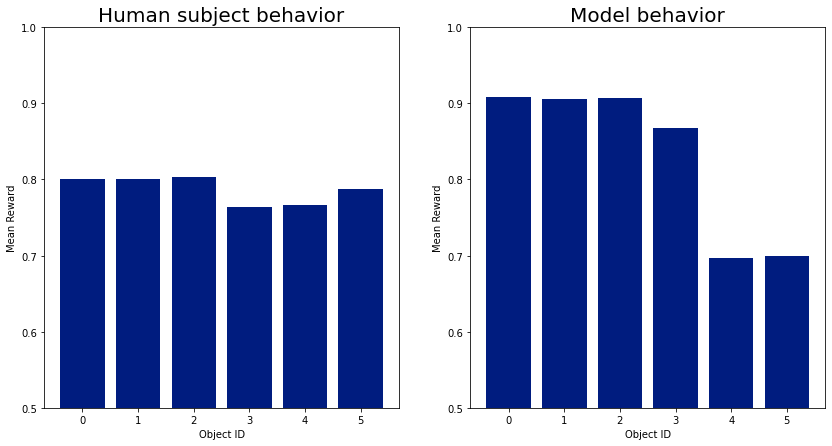

In [11]:
# is there training artifact that the stimulus 0-2 are better trained?
# Ans: yes
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

obj_rewards = df_behav.groupby('observations').rewards.mean().tolist()
axs[0].bar(np.arange(len(obj_rewards)), obj_rewards)
axs[0].set_title('Human subject behavior')

obj_rewards = df_model.groupby('observations').rewards.mean().tolist()
axs[1].bar(np.arange(len(obj_rewards)), obj_rewards)
axs[1].set_title('Model behavior')

for i in range(2):
    axs[i].set_xlabel('Object ID')
    axs[i].set_ylabel('Mean Reward')
    axs[i].set_ylim([0.5, 1])

## Obsolete: This visualizes the two-step task

In [ ]:
from stable_baselines.common.cmd_util import make_vec_env

from utils.utils import Simulation
from utils.visualization import plot_best_action_reversal, calc_stay_prob, plot_stay_prob, visualize_hidden_units
from envs.TwoStepTask import TwoStepTask
from envs.GuessBoundary import GuessBoundaryTask

env = TwoStepTask(prob_switch_reward=0.05, num_trials=200)
env = make_vec_env(lambda: env, n_envs=1)

sims = [Simulation('./outputs/A2C-LSTM10_Standard_PSwitch5e-2/train25000', env = env),
              Simulation('./outputs/A2C-LSTM10_Standard_PSwitch5e-2/train500000', env = env)]
            
fig, axs = plt.subplots(3, len(sims), figsize = (16, 16))
fig.suptitle('Training Steps: 25K / 500K', fontsize=30)
for ctr, sim in enumerate(sims):
    sim.evaluate()
    
    # first row: how fast can the model switch behaviors after a switch
    plotActionReversal(axs[0, ctr], sim.TestRollouts)
    
    # second row: MB or MF behavior?
    stayProb, _, _ = calcStayProb(sim.TestRollouts)
    plotStayProb(axs[1, ctr], stayProb)
    
    # third row: try to visualize the hidden units
    vis = visualizeH(axs[2, ctr], sim.TestRollouts)